# 03. Holt Winters Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
df = pd.read_csv('../../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.dropna(inplace=True)

In [11]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [13]:
span = 12
alpha = 2/(span+1)

In [16]:
df['EMWA-12']=df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [17]:
df.head()

,Thousands of Passengers,EMWA-12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [21]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
df['SES12'] = fitted_model.fittedvalues.shift(-1)
#df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [24]:
df.head()

,Thousands of Passengers,EMWA-12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [38]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [39]:
df.head()

,Thousands of Passengers,EMWA-12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336166,112.049247
1949-02-01,118,112.923077,112.923077,120.336166,118.051885
1949-03-01,132,115.857988,115.857988,134.336166,132.058041
1949-04-01,129,117.879836,117.879836,131.336166,129.056722
1949-05-01,121,118.359861,118.359861,123.336166,121.053204


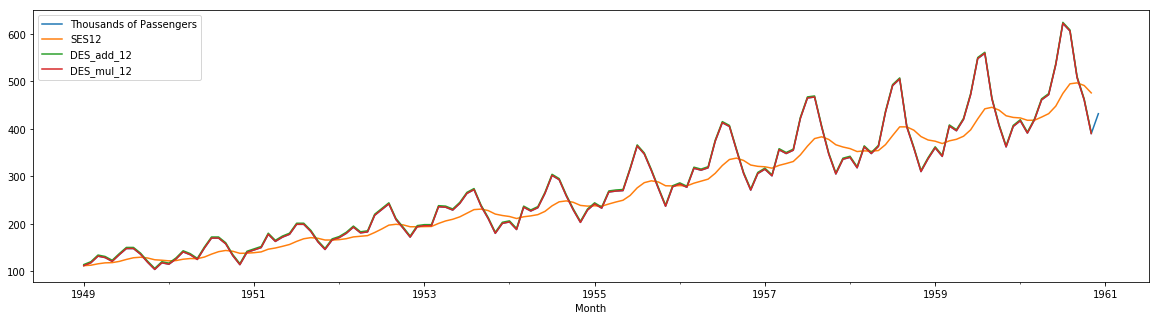

In [40]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].plot(figsize=(20,5))

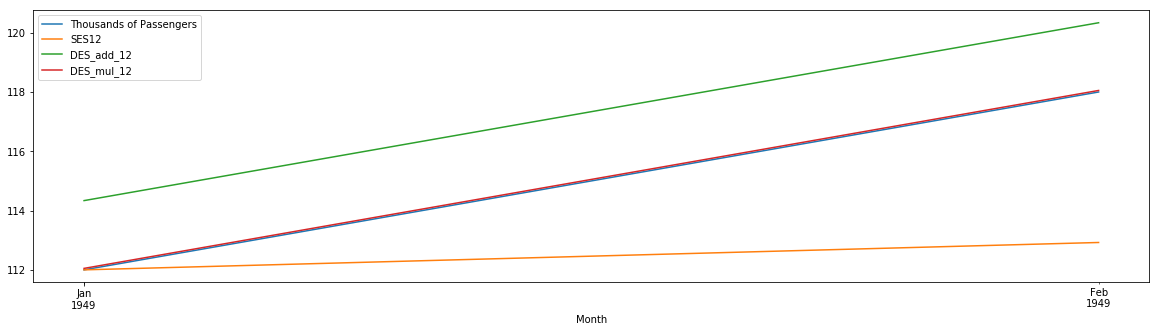

In [45]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[:2].plot(figsize=(20,5))